In [1]:
import torch
torch.cuda.is_available()

True

In [1]:
cd ./hanhwa/

c:\Users\Sejong\Desktop\hanhwa\hanhwa


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
warnings.filterwarnings('ignore')
from function_file.ML_functions import make_dataframe

from sklearn.model_selection import train_test_split

In [15]:
ls

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 702E-35B2

 c:\Users\Sejong\Desktop\hanhwa ���͸�

2023-11-28  ���� 10:44    <DIR>          .
2023-11-27  ���� 09:56    <DIR>          ..
2023-11-23  ���� 12:36    <DIR>          __pycache__
2023-11-28  ���� 10:52            55,939 11_29_lstm_single.ipynb
2023-11-28  ���� 06:57           124,272 11_29_trans_single.ipynb
2023-11-28  ���� 11:25           189,625 deep_learning.ipynb
2023-11-28  ���� 12:14    <DIR>          function_file
2023-11-09  ���� 05:36    <DIR>          gps
2023-09-21  ���� 12:38    <DIR>          hanhwa
2023-11-22  ���� 10:40           118,722 machine_learning.ipynb
2023-11-28  ���� 11:18    <DIR>          model
2023-11-14  ���� 09:55    <DIR>          new_temp_file
2023-11-28  ���� 07:28                74 README.md
2023-09-21  ���� 12:39                50 requirements.txt
2023-11-09  ���� 06:40    <DIR>          temp_add_gps
2023-11-09  ���� 05:38    <DIR>          temperature_csv_file
2023-10-06  ���� 12:53    <D

In [5]:
cd ..

c:\Users\Sejong\Desktop\hanhwa


In [2]:
_, df = make_dataframe(60, 20)
df

,TEMP,TIME
0,286.797,0
1,287.082,1
2,285.938,2
3,285.772,3
4,286.357,4
...,...,...
664791,865.029,664791
664792,864.985,664792
664793,865.048,664793
664794,865.040,664794


In [3]:
import torch.nn as nn
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


lr = 0.001
num_epochs = 100
criterion = nn.MSELoss()


def train_one_epoch():
    model.train(True)
    print(f"Epoch : {epoch + 1}")
    training_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        X_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(X_batch)
        loss = criterion(output, y_batch)
        training_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 1000 == 999:
            #avg_loss_cross_batches = training_loss / 1000
            #print("Batch {0}, Training Loss : {1}".format(batch_size+1, loss))
            pass
        training_loss = 0.0

def validate_one_epoch():
    model.train(False)
    validation_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        X_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(X_batch)
            loss = criterion(output, y_batch)
            validation_loss += loss.item()

    avg_loss_across_batches = validation_loss / len(test_loader)

    #print('Val loss : {0}'.format(avg_loss_across_batches))

In [4]:
from function_file.deeplearning_function import DEEPLEARNING, plot_prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
train_loader, test_loader, X_test, y_test = DEEPLEARNING(df, 30, batch_size = 512, front_or_back='back')

In [7]:
for batch in train_loader:
    print(batch[0].shape, batch[1].shape)
    break

torch.Size([512, 30, 1]) torch.Size([512, 1])


lookback size :  10
Epoch : 1
Epoch : 2
Epoch : 3
Epoch : 4
Epoch : 5
Epoch : 6
Epoch : 7
Epoch : 8
Epoch : 9
Epoch : 10
Epoch : 11
Epoch : 12
Epoch : 13
Epoch : 14
Epoch : 15
Epoch : 16
Epoch : 17
Epoch : 18
Epoch : 19
Epoch : 20
Epoch : 21
Epoch : 22
Epoch : 23
Epoch : 24
Epoch : 25
Epoch : 26
Epoch : 27
Epoch : 28
Epoch : 29
Epoch : 30
Epoch : 31
Epoch : 32
Epoch : 33
Epoch : 34
Epoch : 35
Epoch : 36
Epoch : 37
Epoch : 38
Epoch : 39
Epoch : 40
Epoch : 41
Epoch : 42
Epoch : 43
Epoch : 44
Epoch : 45
Epoch : 46
Epoch : 47
Epoch : 48
Epoch : 49
Epoch : 50
Epoch : 51
Epoch : 52
Epoch : 53
Epoch : 54
Epoch : 55
Epoch : 56
Epoch : 57
Epoch : 58
Epoch : 59
Epoch : 60
Epoch : 61
Epoch : 62
Epoch : 63
Epoch : 64
Epoch : 65
Epoch : 66
Epoch : 67
Epoch : 68
Epoch : 69
Epoch : 70
Epoch : 71
Epoch : 72
Epoch : 73
Epoch : 74
Epoch : 75
Epoch : 76
Epoch : 77
Epoch : 78
Epoch : 79
Epoch : 80
Epoch : 81
Epoch : 82
Epoch : 83
Epoch : 84
Epoch : 85
Epoch : 86
Epoch : 87
Epoch : 88
Epoch : 89
Epoch : 90

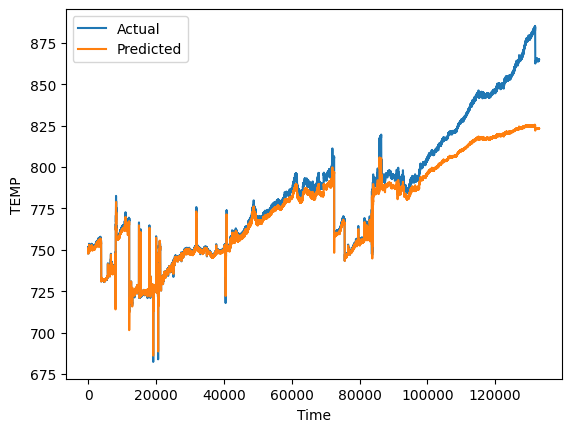

0.8567792084725947
8.605622849969812
15.287997834818935
lookback size :  20
Epoch : 1
Epoch : 2
Epoch : 3


KeyboardInterrupt: 

In [18]:
from function_file.deeplearning_function import DEEPLEARNING, plot_prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

lookback_list = [10,20,60,100]

for lookback in lookback_list:
    model = LSTM(1,4,1)
    model.to(device)
    optimizer = torch.optim.Adam(params = model.parameters(), lr = lr)
    batch_size = 512
    train_loader, test_loader, X_test, y_test = DEEPLEARNING(df, lookback, batch_size = batch_size, front_or_back='back')
    print("lookback size : ", lookback)

    for epoch in range(num_epochs):
        train_one_epoch()
        validate_one_epoch()


    
    print("***********************************************")
    test_predictions, new_y_test = plot_prediction(model, X_test, y_test, lookback)
    plt.plot(new_y_test, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('TEMP')
    plt.legend()
    plt.show()
    print(r2_score(new_y_test, test_predictions))
    print(mean_absolute_error(new_y_test, test_predictions))
    print(mean_squared_error(new_y_test, test_predictions)**0.5)